  Sample #  Best Accuracy Best SVM Parameters (Kernel, Nu, Epsilon)
0       S1          98.89                      (poly, 0.045, 0.425)
1       S2          99.07                      (poly, 0.049, 0.763)
2       S3          97.04                      (poly, 0.016, 0.912)
3       S4          98.89                      (poly, 0.011, 0.899)
4       S5          99.07                      (poly, 0.179, 0.143)
5       S6          98.89                      (poly, 0.179, 0.737)
6       S7          99.26                      (poly, 0.069, 0.249)
7       S8          99.26                       (poly, 0.064, 0.77)
8       S9          99.26                      (poly, 0.146, 0.768)
9      S10          98.33                       (rbf, 0.029, 0.284)


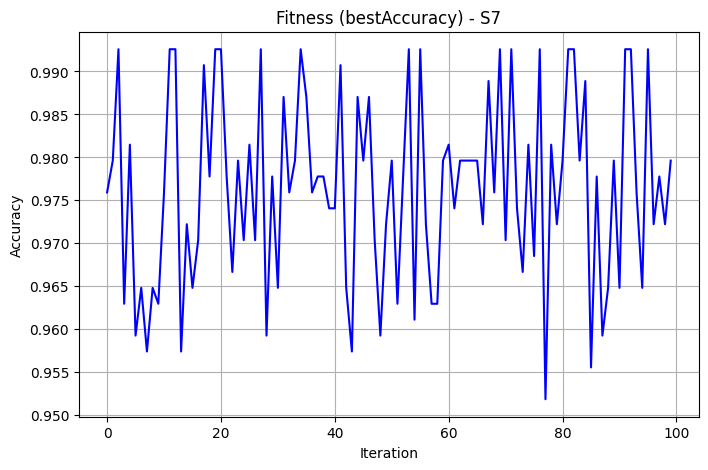

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load UCI Digits Dataset
digits = load_digits()
X = digits.data
y = digits.target

# Store results
results = []

# Try 10 different random splits (samples)
for i in range(10):
    # Train-test split (70-30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Normalize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_acc = 0
    best_params = None
    acc_curve = []

    # Run 100 iterations with random SVM parameters
    for iteration in range(100):
        kernel = np.random.choice(['linear', 'rbf', 'poly'])

        # Constrain nu to safe range (too high causes model to fail)
        nu = np.random.uniform(0.01, 0.4)
        epsilon = np.random.uniform(0.01, 1)  # Just to log, not used by NuSVC

        try:
            clf = svm.NuSVC(kernel=kernel, nu=nu, random_state=42)
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)
            acc = accuracy_score(y_test, preds)
        except:
            acc = None  # Skip invalid models

        if acc is not None:
            acc_curve.append(acc)
            if acc > best_acc:
                best_acc = acc
                best_params = (kernel, round(nu, 3), round(epsilon, 3))

    results.append({
        "Sample": f"S{i+1}",
        "Accuracy": round(best_acc * 100, 2),
        "Params": best_params,
        "Accuracy Curve": acc_curve
    })

# Display results in a table
df_results = pd.DataFrame([
    [r["Sample"], r["Accuracy"], r["Params"]]
    for r in results
], columns=["Sample #", "Best Accuracy", "Best SVM Parameters (Kernel, Nu, Epsilon)"])

print(df_results)

# Save to CSV
df_results.to_csv("svm_optimization_results.csv", index=False)

# Plot convergence for best sample
best_sample = max(results, key=lambda x: x["Accuracy"])
plt.figure(figsize=(8, 5))
plt.plot(best_sample["Accuracy Curve"], color='blue')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Fitness (bestAccuracy) - " + best_sample["Sample"])
plt.grid(True)
plt.savefig("convergence_best_svm.png")
plt.show()


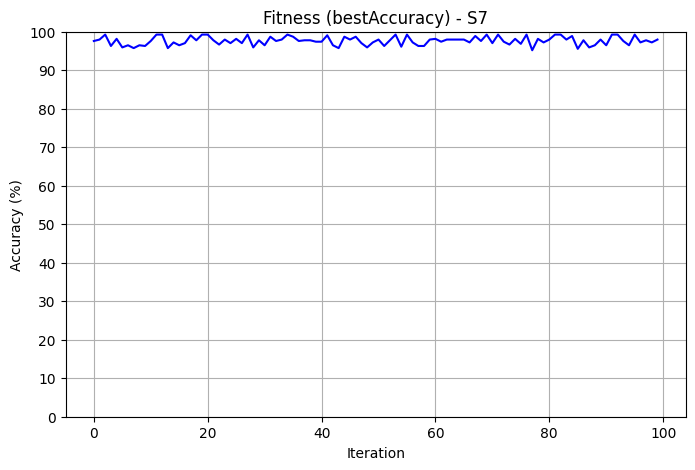

In [4]:
import matplotlib.pyplot as plt

# Get best sample (highest accuracy)
best_sample = max(results, key=lambda x: x["Accuracy"])

# Convert accuracy to percentages
acc_percent = [a * 100 for a in best_sample["Accuracy Curve"]]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(acc_percent, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.title("Fitness (bestAccuracy) - " + best_sample["Sample"])

# Set Y-axis from 0 to 100 with step of 10
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

plt.grid(True)
plt.savefig("convergence_best_svm.png")
plt.show()

